<a href="https://colab.research.google.com/github/caujw/fchollet/blob/main/chapter02_mathematical-building-blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks(신경망의 수학적 구성 요소)

## A first look at a neural network(신경망과의 첫 만남)

**Loading the MNIST dataset in Keras(케라스에서 MNIST dataset 적재하기)**

In [48]:
#tensorflow의 keras의 datasets에서 mnist데이터를 가져온다.
#MNIST dataset은 넘파이 배열 형태로 케라스에 이미 포함되어있다.
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [49]:
#윗 줄 코드와 동일한 코드
import tensorflow as tf 
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_labels.shape

(10000,)

In [ ]:
len(train_images)

60000

In [ ]:



len(train_labels)

60000

In [ ]:
len(test_images)

10000

In [ ]:
len(test_labels)

10000

In [ ]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
print(train_images[0])
print(train_labels[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

**The network architecture(신경망 구조)**

In [50]:
#신경망 만들기
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"), # 512는 어디서 정해졌는가?
    layers.Dense(10, activation="softmax")
])


#softmax : 소프트맥스 함수는 선택해야 하는 선택지의 총 개수를 k라고 할 때, k차원의 벡터를 입력받아 각 클래스에 대한 확률을 추정합니다. 


In [ ]:
model

**The compilation step(컴파일 단계)**

In [51]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 옵티마이저 : 입력된 데이터와 손실 함수를 기반으로 네트워크를 업데이트하는 매커니즘.
# 손실함수 : 훈련 데이터에서 신경망의 성능을 측정하는 방법. 네트워크가 옳은 방향으로 학습할 수 있도록 도와줌.
# 훈련과 테스트 과정을 모니터링할 지표

**Preparing the image data(이미지 데이터 준비하기)**

In [ ]:
train_images[0].shape
#이미지 데이터의 크기를 바꾸기 전에는 2차원인 (28, 28)을 반환한다.

(28, 28)

In [ ]:
train_images[0]
#이미지가 0~255 사이의 값을 가진다.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [52]:
"""
데이터를 네트워크에 맞는 크기로 바꾸고 모든 값을 0과 1 사이로 스케일을 조정해야함.
현재 훈련 이미지 : [0, 255] 사이의 값을 가지는 unit8   타입의 (60000, 28, 28)  크기를 가진 배열로 저장되어있음.
바꿀 훈련 이미지 : [0, 1]   사이의 값을 가지는 float32 타입의 (60000, 28 * 28) 크기를 가진 배열로 바꿔야한다.

unit8 : 2^8개의 양수만 표현 가능. 즉, 0~255까지 표현 가능
float32 : 8bit 지수, 23bit 소수로 구성되어있음


"""

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
# 255로 나눠서 0과 1 사이의 값을 가지게 만들었음

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
train_images[0].shape
#이미지 데이터를 바꿨기 때문에 1차원인 (784,)를 반환한다.

(784,)

In [ ]:
train_images[0]
#이미지가 0~1 사이의 값을 가진다.

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

**"Fitting" the model(모델 학습)**

In [53]:
model.fit(train_images, train_labels, epochs=5, batch_size = 128)
# epochs = 5 : 같은 데이터를 5번 학습하라는 의미
# 한 번에 모든 데이터를 학습하는 것에 무리가 있기 때문에 데이터셋을 batch_size 크기로 쪼개서 학습.

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2578 - accuracy: 0.9245
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1058 - accuracy: 0.9685
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0699 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0507 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0377 - accuracy: 0.9884


In [ ]:
model.summary()
# 401920 = 784 * 512 + 512
# 5130 = 512 * 10 + 10

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**Using the model to make predictions**

In [ ]:
test_digits = test_images[0:10]
#test_images의 1에서 10까지 가져와서 test_digits에 넣으라는 의미

print(test_labels[0:10])

predictions = model.predict(test_digits)
print(predictions[0])
predictions[1]

[7 2 1 0 4 1 4 9 5 9]
[7.7432133e-10 5.6243804e-10 5.4992267e-07 3.6680171e-06 3.3057747e-12
 2.5315277e-09 4.2852301e-14 9.9999452e-01 2.5266811e-08 1.2696496e-06]


array([2.0631088e-12, 1.2854628e-07, 9.9999988e-01, 7.9352205e-09,
       2.4976977e-18, 4.3275541e-10, 2.8179276e-10, 2.7255872e-18,
       6.1010401e-09, 1.7227623e-17], dtype=float32)

In [ ]:
predictions[0].argmax()
# argmax() : 최댓값의 색인 위치를 반환

7

In [ ]:
predictions[0][7]
# 0번째 색인이 7일 확률을 반환

0.9999945

In [ ]:
predictions[1][2]
# 1번째 색인이 2일 확률을 반환

0.9999999

In [ ]:
test_labels[0]

7

**Evaluating the model on new data**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0632 - accuracy: 0.9811
test_acc: 0.9811000227928162


## Data representations for neural networks(신경망을 위한 데이터 표현)

Tensor is a container for data

### Scalars (rank-0 tensors)(스칼라, 0D tensors)

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

### Vectors (rank-1 tensors)(벡터, 1D tensors)

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim

1

### Matrices (rank-2 tensors)(행렬, 2D tensors)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [ ]:
x.ndim

2

### Rank-3 and higher-rank tensors(3D 텐서와 고차원 텐서)

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [ ]:
x.ndim

3

### Key attributes(텐서의 핵심 속성)

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#축의 개수 확인
train_images.ndim

3

In [ ]:
# 배열의 크기 확인
train_images.shape

(60000, 28, 28)

In [ ]:
#데이터 타입 확인
train_images.dtype

dtype('uint8')

**Displaying the fourth digit(다섯 번째 이미지 출력하기)**

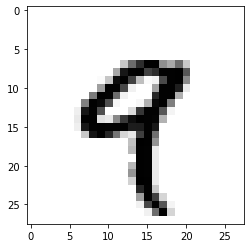

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#이해안됨

In [ ]:
print(train_labels[0:10])

[5 0 4 1 9 2 1 3 1 4]


In [ ]:
train_labels[4]

### Manipulating tensors in NumPy(넘파이로 텐서 조작하기)

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

# 원래 train_images.shape는 (60000, 28, 28) : (샘플 개수, 행, 열)

(90, 28, 28)

In [ ]:
#위 코드와 같은 결과를 반환
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
#위 코드와 같은 결과를 반환
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[0:10, 0:2, :]
print(my_slice[0])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
#이미지 오른쪽 아래 14*14픽셀 반환
my_slice = train_images[:, 14:, 14:]
print(my_slice)

[[[240 253 253 ...   0   0   0]
  [ 45 186 253 ...   0   0   0]
  [  0  16  93 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[241 243 234 ...   0   0   0]
  [143  91  28 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 ...

 [[253 254 253 ...   0   0   0]
  [ 72 192 254 ...   0   0   0]
  [  0   6 242 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0  31 127 ...   0   0   0]
  [ 27 218 252 ...   0   0   0]
  [194 253 217 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0  

(60000, 14, 14)
[[[ 49 238 253 ...  93  82  82]
  [ 18 219 253 ...   0   0   0]
  [  0  80 156 ...   0   0   0]
  ...
  [  0   0   0 ... 253 207   2]
  [  0   0   0 ... 250 182   0]
  [  0   0   0 ...  78   0   0]]

 [[  0   0   0 ...  84 252 253]
  [  0   0   0 ...  96 189 253]
  [  0   0   0 ...  47  79 255]
  ...
  [252 145   0 ... 252 173   0]
  [253 225   0 ... 162   0   0]
  [252 249 146 ...  56   0   0]]

 [[  0   0   0 ...   0   2 153]
  [  0   0   0 ...   0  27 254]
  [  0   0   0 ...   0 183 254]
  ...
  [  0   0   0 ... 254  57   0]
  [  0   0   0 ... 254  57   0]
  [  0   0   0 ... 255  94   0]]

 ...

 [[  0   0   0 ... 223 159 131]
  [  0   0   0 ...  27   0   0]
  [  0   0  54 ...   0   0   0]
  ...
  [  0   0   0 ... 173   0   0]
  [  0   0   0 ... 173   0   0]
  [  0   0   0 ...  74   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [247 110   0 ... 146 163  63]
  [236 128   0 ... 178  12   0]
  [239 196 1

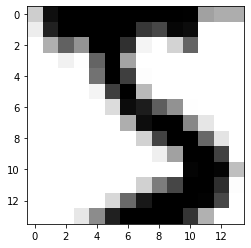

In [ ]:
#이미지 정중앙 14*14픽셀 반환
my_slice = train_images[:, 7:-7, 7:-7]
print(my_slice.shape)
print(my_slice)

plt.imshow(my_slice[0], cmap=plt.cm.binary)
plt.show()

### The notion of data batches(배치 데이터)

1st axis of data tensors in deep learning will be sample axis
Deep learning models don't process an entire dataset at once

In [ ]:
# 1st batch
batch = train_images[:128]

In [ ]:
# 2nd batch
batch = train_images[128:256]

In [ ]:
# nth batch
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

(samples, features)

### Timeseries data or sequence data

(samples, timesteps, features)

### Image data

(samples, height, width, channels)

흑백 : channel이 1이라 3D

컬러 : channel이 3으로 구성(RGB)

### Video data

(samples, frames, height, width, channels)

ex)
A 60 second 144*256 YouTube video clip sampled at 4 frames per second sould have 240 frames. A batch of four such video clips would be stored in a tensor of shape (4, 240, 144, 256, 3)

## The gears of neural networks: tensor operations(신경망의 톱니바퀴: 텐서 연산)

Tensor operations applied to tensors of numeric data.

ex)

keras.layers.Dense(512, activation = 'relu')

unpack this)

output = relu(dot(W,input) + b)

Three tensor operations
1. dot product : dot between input tensor and a tensor W
2. addition : between the resulting 2D tensor and vector b
3. relu operation : relu(x) is max(x, 0)

### Element-wise operations(원소별 연산)

ReLU 함수와 덧셈이 원소별 연산에 속함

In [72]:
#ReLU 연산 구현

def naive_relu(x):
    assert len(x.shape) == 2  # It means x.ndim() must 2
    x = x.copy()  # .copy()를 사용해야 입력텐서가 바뀌지 않는다. 사용하지 않으면 입력 텐서 자체를 바꿔버림
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [63]:
import numpy as np

In [69]:
# example

x1 = np.array([[1, -2, 3], [2, 3, -1]])
x1

array([[ 1, -2,  3],
       [ 2,  3, -1]])

In [70]:
print(x1.ndim)
print(x1.shape)

2
(2, 3)


In [71]:
naive_relu(x1)

array([[1, 0, 3],
       [2, 3, 0]])

In [92]:
# 덧셈 구현

def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [93]:
# example

x = np.array([[1, -2, 3], [2, 3, -1]])
y = np.array([[1, 2, 3], [3, 2, 1]])

naive_add(x, y)

array([[2, 0, 6],
       [5, 5, 0]])

In [89]:
# numpy를 이용한 원소별 relu 구현(element wise relu)

z = np.array([[1, -2, 3], [2, 3, -1]])

z = np.maximum(z, 0.)
print(z)

[[1. 0. 3.]
 [2. 3. 0.]]


In [94]:
# numpy를 이용한 원소별 덧셈 구현(element wise add)

x = np.array([[1, -2, 3], [2, 3, -1]])
y = np.array([[1, 2, 3], [3, 2, 1]])

z = x + y
print(z)


[[2 0 6]
 [5 5 0]]


In [110]:
#연산 시간 비교하기

# 시간이 짧게 걸림

import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

[[0.67805908 0.7593941  0.39048747 ... 0.88368456 0.87341071 0.76566394]
 [0.50927496 0.04080667 0.34974605 ... 0.98623929 0.08189915 0.33482934]
 [0.9022291  0.29291618 0.04108021 ... 0.30810938 0.99140894 0.61104215]
 ...
 [0.35300658 0.20134605 0.07353657 ... 0.35664932 0.13200485 0.6143232 ]
 [0.78971561 0.80811347 0.19047052 ... 0.05562287 0.46102893 0.48838041]
 [0.34797312 0.29032558 0.09088746 ... 0.6764266  0.57580845 0.14884101]]
Took: 0.02 s


In [112]:
# naive version은 시간이 오래 걸림
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.49 s


### Broadcasting(브로드캐스팅)

What happens with addition when the shapes of the two tensors being added differ?

In this case, broadcasitng happens and it consists of two steps.
1. Axes(called broadcast axes) are added to the smaller tensor to match the ndim of the larger tensor
2. The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.

In [96]:
#example

import numpy as np

x = np.array([[1, 1, 1, 1, 1], [1, 1, 1, 1, 1]])
y = np.array([1, 2, 3, 4, 5])

x + y

array([[2, 3, 4, 5, 6],
       [2, 3, 4, 5, 6]])

In [102]:
import numpy as np

x = np.random.random((32, 10))
y = np.random.random((10,))

In [107]:
y = np.expand_dims(y, axis=0)

In [108]:
Y = np.concatenate([y] * 32, axis=0)

In [103]:
#구현 예시(naive version)(실제로는 반복된 연산은 가상적이며 2D텐서가 만들어지지 않음.)

def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]

    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [106]:
# 크기가 다른 두 텐서에 브로드캐스팅으로 원소별 maximum 연산을 적용하는 예

import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

print(z.shape)  # 덧셈 결과인 z 의 dimension은 x와 동일하다.

(64, 3, 32, 10)


### Tensor product(텐서 점곱 = 텐서 곱셈)

In [115]:
# example

# (a, b, c) * (d, e, f) = ad + be + cf

x = [1, 2, 2]
y = [1, -1, 2]

z = np.dot(x, y)

print(z)

3


In [113]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

[0.13797587 0.45309604 0.06184729 0.42502429 0.44860063 0.56197373
 0.84569213 0.51717367 0.60472131 0.52521117 0.04465283 0.49462209
 0.66292655 0.68347331 0.38167595 0.18249665 0.88621252 0.18420858
 0.92289614 0.48873476 0.82566274 0.37925098 0.58310987 0.12427189
 0.9578409  0.86912933 0.49085633 0.45033911 0.23188365 0.95722064
 0.10730464 0.24719541]


In [ ]:
# 두 개의 벡터 x, y의 점곱 구현

def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [119]:
# 행렬 x와 벡터 y의 점곱 구현

# ex) x : a * b 행렬
#     y : b * 1 벡터

def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]  # The first dimension of x must be the same as the 0th dimension of y

    z = np.zeros(x.shape[0])  # This operation returns a vector of 0s with the same shape as y
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):#
            z[i] += x[i, j] * y[j]
    return z

In [117]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [118]:
# 두 행렬 간 점곱 구현

def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]  # x의 두 번째 차원이 y의 첫 번째 차원과 같아야 한다. 

    z = np.zeros((x.shape[0], y.shape[1]))  #이 연산은 0이 채워진 특정 크기의 벡터를 만든다.
    for i in range(x.shape[0]):  # x의 행 반복
        for j in range(y.shape[1]):  # y의 열 반복
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

Tensor dot

More generally, you can take the dot product beween higher-dimensional tensors, following the same rules for shape compatibility as oulined earlier for the 2D case:

(a, b, c, d).(d,) -> (a, b, c)

(a, b, c, d).(d, e) -> (a, b, c , e)

동일한 값이 있으면 그 차원은 사라지고 결과 차원은 그 차원을 제외한 값이다.

### Tensor reshaping(텐서 크기 변환)

In [133]:
train_images = train_images.reshape((60000, 28 * 28))
train_images.shape

(60000, 784)

In [130]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [136]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [137]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])

x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [138]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations(텐서 연산의 기하학적 해석)

### A geometric interpretation of deep learning

Neural networks consist entirely of chains of tensor operations

These tensor operations are just simple geometric transformations of the input data

## The engine of neural networks: gradient-based optimization
## 신경망의 엔진: 그래디언트 기반 최적화

A dense layer :
output = relu(dot(W, input) + b)

W and b are weights or trainable parameters
Gradual adjustment of them is called training

훈련 반복 루프

1. 훈련 샘플 x와 이에 상응하는 타깃 y의 배치를 추출합니다.
2. x를 사용하여 네트워크를 실행하고(정방향 패스 단계), 예측 y_pred(y prediction)를 구합니다.
3. y_pred와 y의 차이를 측정하여 이 배치에 대한 네트워크의 손실을 계산합니다.
4. 배치에 대한 손실이 조금 감소되도록 네트워크의 모든 가중치를 업데이트합니다.

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [ ]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

### Evaluating the model

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

## Summary